In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime

# Set Seaborn style for better visuals
sns.set(style="whitegrid")


In [36]:
def load_data(file_path):
   
    print("Starting data loading...")
    df = pd.read_csv(file_path)
    print("Data Loaded Successfully! Here are the first few rows of the dataset:")
    print(df.head())
    
    # Print the shape (rows and columns) before cleaning
    print(f"\nShape of the data before cleaning: {df.shape[0]} rows, {df.shape[1]} columns")
    print("Data loading complete.\n")
    return df

file_path = 'retail_data.csv'
df = load_data(file_path)


Starting data loading...
Data Loaded Successfully! Here are the first few rows of the dataset:
   Transaction_ID  Customer_ID                 Name                Email  \
0       8691788.0      37249.0  Michelle Harrington    Ebony39@gmail.com   
1       2174773.0      69749.0          Kelsey Hill     Mark36@gmail.com   
2       6679610.0      30192.0         Scott Jensen    Shane85@gmail.com   
3       7232460.0      62101.0        Joseph Miller     Mary34@gmail.com   
4       4983775.0      27901.0        Debra Coleman  Charles30@gmail.com   

          Phone                      Address        City            State  \
0  1.414787e+09            3959 Amanda Burgs    Dortmund           Berlin   
1  6.852900e+09           82072 Dawn Centers  Nottingham          England   
2  8.362160e+09            4133 Young Canyon     Geelong  New South Wales   
3  2.776752e+09  8148 Thomas Creek Suite 100    Edmonton          Ontario   
4  9.098268e+09    5813 Lori Ports Suite 269     Bristol       

In [ ]:
# handle missing values and datatype of date and time
def clean_data(df):
    
    print("Starting data cleaning...")
    
    # Print the shape  before cleaning
    print(f"\nShape of the data before cleaning: {df.shape[0]} rows, {df.shape[1]} columns")
    
    # Fill mising values with mean of rating
    df.fillna({'Feedback': 'No feedback', 'Ratings': df['Ratings'].mean()}, inplace=True)

    # convert 'Date' column to datetime proper format and handle missing dates
    df['Date'] = pd.to_datetime(df['Date'], errors='coerce')
    df.dropna(subset=['Date'], inplace=True)

    # Convert numeric columns to the correct data types or convert into Nan
    df['Income'] = pd.to_numeric(df['Income'], errors='coerce')
    df['Amount'] = pd.to_numeric(df['Amount'], errors='coerce')

    # Drop irrelevant columns 
    df.drop(columns=['Email', 'Phone', 'Address'], inplace=True, errors='ignore')

    # Print the shape after cleaning
    print(f"\nShape of the data after cleaning: {df.shape[0]} rows, {df.shape[1]} columns")
    print("\n\n")
    print("Data cleaning completed.Following is the first few rows of the cleaned dataset:")
    print(df.head())
    print("Data cleaning complete.\n")
    return df


df = clean_data(df)


Starting data cleaning...

Shape of the data before cleaning: 301651 rows, 27 columns

Shape of the data after cleaning: 301651 rows, 27 columns



Data cleaning completed.Following is the first few rows of the cleaned dataset:
   Transaction_ID  Customer_ID                 Name        City  \
0       8691788.0      37249.0  Michelle Harrington    Dortmund   
1       2174773.0      69749.0          Kelsey Hill  Nottingham   
2       6679610.0      30192.0         Scott Jensen     Geelong   
3       7232460.0      62101.0        Joseph Miller    Edmonton   
4       4983775.0      27901.0        Debra Coleman     Bristol   

             State  Zipcode    Country   Age  Gender  Income  ...  \
0           Berlin  77985.0    Germany  21.0    Male     NaN  ...   
1          England  99071.0         UK  19.0  Female     NaN  ...   
2  New South Wales  75929.0  Australia  48.0    Male     NaN  ...   
3          Ontario  88420.0     Canada  56.0    Male     NaN  ...   
4          England  4870

In [42]:
# explore and summary
def data_summary(df):
    
    print("Starting data exploration and summary...")
    print("\nDataset Details:")
    print(df.info())
    print("\nStatistical Summary:")
    print(df.describe())

    #define grouping columns and metrics for summarization
    groupings = ['Customer_Segment', 'Product_Category']
    metrics = ['Total_Purchases', 'Ratings']

    #loop for grouping columns to calculate summary statistics using mean
    for grouping in groupings:
        print(f"\nSummary statistics by {grouping}:")
        for metric in metrics:
            print(f"\nTotal {metric} by {grouping}:")
            print(df.groupby(grouping)[metric].mean())

    print("Data exploration and summary complete.\n")


data_summary(df)


Starting data exploration and summary...

Dataset Details:
<class 'pandas.core.frame.DataFrame'>
Index: 301651 entries, 0 to 302009
Data columns (total 27 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   Transaction_ID    301318 non-null  float64       
 1   Customer_ID       301343 non-null  float64       
 2   Name              301270 non-null  object        
 3   City              301403 non-null  object        
 4   State             301372 non-null  object        
 5   Zipcode           301312 non-null  float64       
 6   Country           301380 non-null  object        
 7   Age               301479 non-null  float64       
 8   Gender            301334 non-null  object        
 9   Income            0 non-null       float64       
 10  Customer_Segment  301436 non-null  object        
 11  Date              301651 non-null  datetime64[ns]
 12  Year              301301 non-null  float64       
 13  Month

Starting data visualization...
Plotting Age Distribution of Customers...


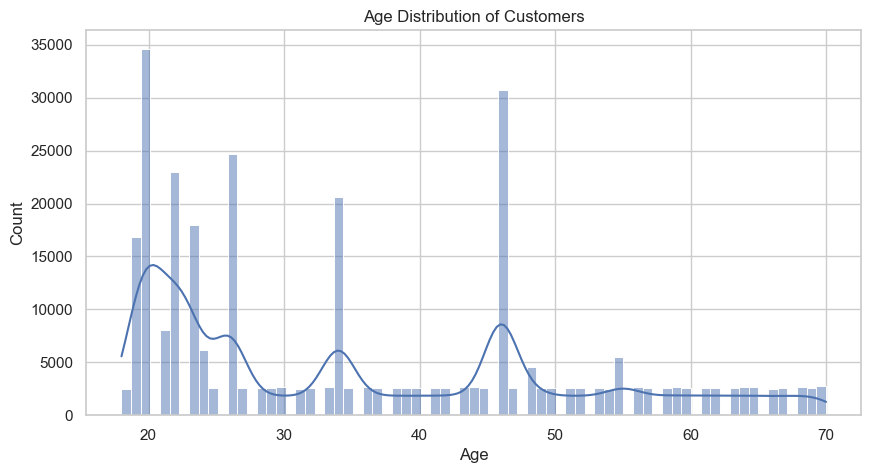

Age Distribution of Customers complete.

Plotting Total Amount Spent by Customer Segment...


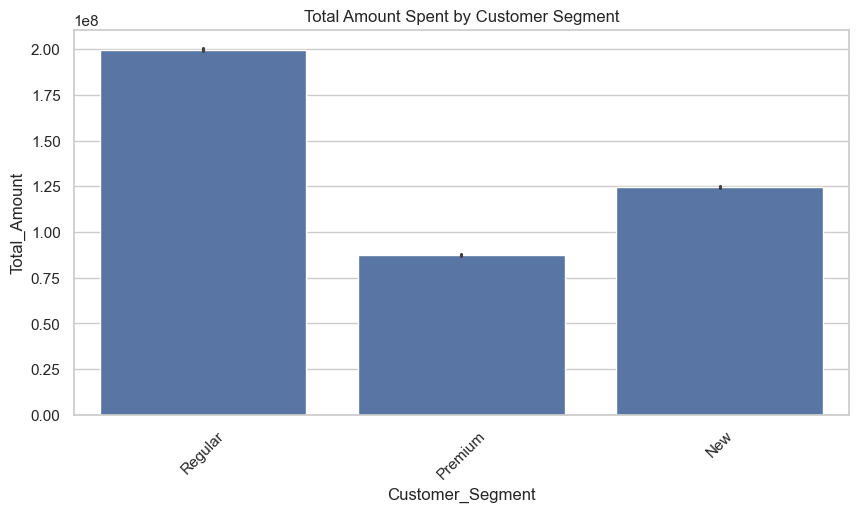

Total Amount Spent by Customer Segment complete.

Plotting Distribution of Customer Ratings...


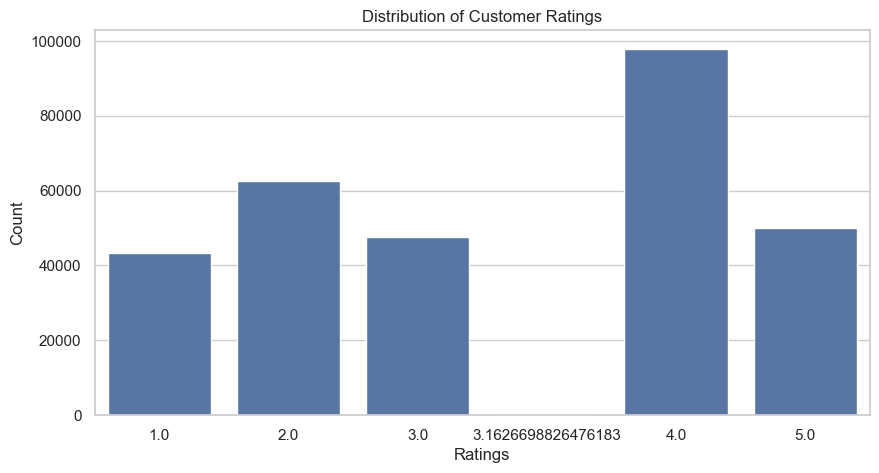

Distribution of Customer Ratings complete.

Plotting Total Purchases by Month...


C:\Users\HP\AppData\Local\Temp\ipykernel_8264\2682838274.py:34: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(data=df, x=plot['column'], y=plot['y'], estimator='sum', ci=None)


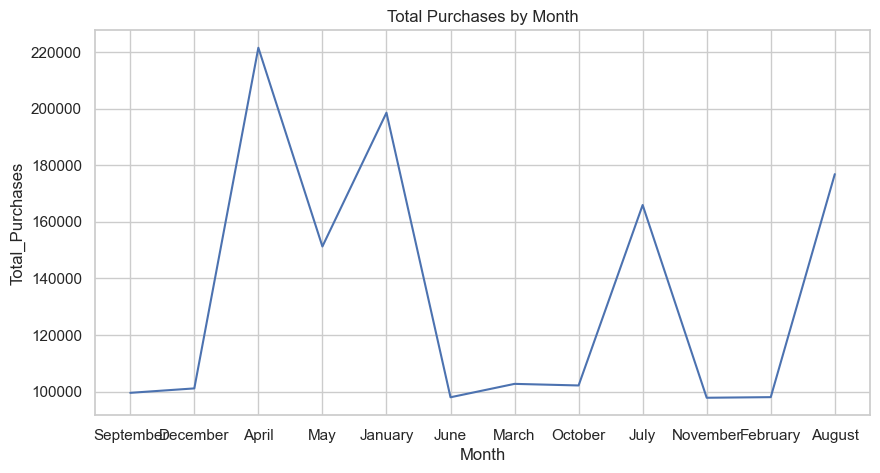

Total Purchases by Month complete.

All data visualizations complete.



In [46]:

def plot_data(df):
    
    print("Starting data visualization...")

    # list of columns and titles in form of dictionaries so we can create graphg accordingly
    plot_list = [
        {'column': 'Age', 'plot_type': 'hist', 'title': 'Age Distribution of Customers'},
        {'column': 'Customer_Segment', 'y': 'Total_Amount', 'plot_type': 'bar', 
         'title': 'Total Amount Spent by Customer Segment'},
        {'column': 'Ratings', 'plot_type': 'count', 'title': 'Distribution of Customer Ratings'},
        {'column': 'Month', 'y': 'Total_Purchases', 'plot_type': 'line', 'title': 'Total Purchases by Month'}
    ]

    # Loop to go through plot_type in dictionaries
    for plot in plot_list:
        plt.figure(figsize=(10, 5))
        print(f"Plotting {plot['title']}...")
        
        # Histogram graph
        if plot['plot_type'] == 'hist':
            sns.histplot(df[plot['column']], kde=True)
        
        # Bar graph
        elif plot['plot_type'] == 'bar':
            sns.barplot(x=plot['column'], y=plot['y'], data=df, estimator=np.sum)
            plt.xticks(rotation=45)
        
        # Count graph
        elif plot['plot_type'] == 'count':
            sns.countplot(x=plot['column'], data=df)
        
        # Line graph
        elif plot['plot_type'] == 'line':
            sns.lineplot(data=df, x=plot['column'], y=plot['y'], estimator='sum', ci=None)

        # Titles and labels
        plt.title(plot['title'])
        plt.xlabel(plot['column'])
        plt.ylabel(plot.get('y', 'Count'))
        plt.show()
        print(f"{plot['title']} complete.\n")

    print("All data visualizations complete.\n")
plot_data(df)